In [3]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt

In [20]:
temp = 21.2
hy = 0.29
l = 1.16
R = 8.31

In [25]:
mu_air = 28.97
mu_water = 18.01
mu_co2 = 44.01
Cp_air = 1.0036
Cp_water = 1.863
Cp_co2 = 0.838
Cv_air = 0.7166
Cv_water = 1.403
Cv_co2 = 0.649
mus = np.array([mu_air, mu_water, mu_co2]) / 1000
Cps = np.array([Cp_air, Cp_water, Cp_co2])
Cvs = np.array([Cv_air, Cv_water, Cv_co2])

In [27]:
def vel(temp, hy, x_co2):
    T = temp + 273.15
    x_water = 2642.4 * water / 10**5
    xs = np.array([1 - x_water - x_co2, x_water, x_co2])
    mu = np.dot(mus, xs)
    Cp = np.dot(Cps * mus, xs)
    Cv = np.dot(Cvs * mus, xs)
    gamma = Cp / Cv
    return (gamma * R * T / mu) ** 0.5

print(vel(temp, hy, 0.006))

343.2409278335761


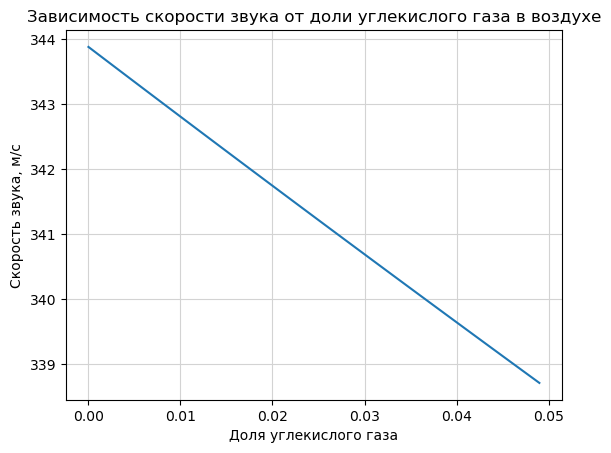

In [33]:
x_co2 = np.arange(0, 0.05, 0.001)
vels = np.array([vel(temp, hy, x) for x in x_co2])
f1, a1 = plt.subplots()
a1.grid(color='lightgray')
a1.plot(x_co2, vels)
a1.set_title('Зависимость скорости звука от доли углекислого газа в воздухе')
a1.set_xlabel('Доля углекислого газа')
a1.set_ylabel('Скорость звука, м/с')

k, b = np.polyfit(vels, x_co2, 1) # x_co2 = kv + b

In [4]:
v1 = p.read_csv('1mikro.txt')
v2 = p.read_csv('2mikro.txt')
v1_ = p.read_csv('gryaz1mikro.txt')
v2_ = p.read_csv('gryaz2mikro.txt')

In [39]:
f = 500000

def t(v):
    return np.arange(0, len(v)) / f

445.1266308518803


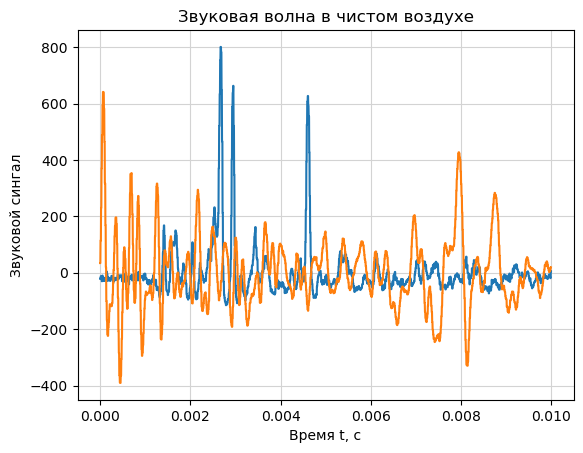

In [41]:
f2, a2 = plt.subplots()
a2.grid(color='lightgray')
a2.plot(t(v1), v1 - v1.mean())
a2.plot(t(v2), v2 - v2.mean())
a2.set_title('Звуковая волна в чистом воздухе')
a2.set_xlabel('Время t, с')
a2.set_ylabel('Звуковой сингал')

vel1 = l * f / (np.argmax(v1) - np.argmax(v2))
print(vel1)

1060.3290676416818


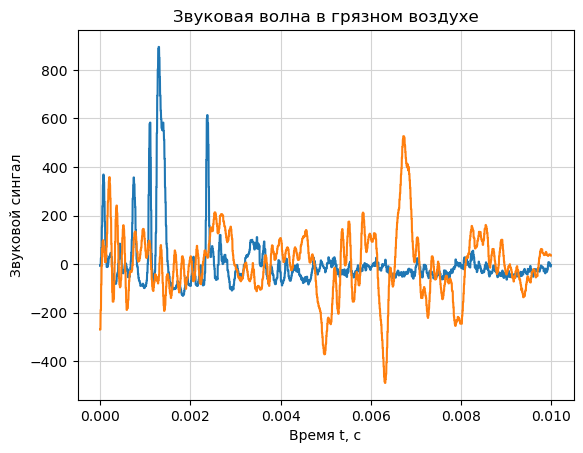

In [44]:
f3, a3 = plt.subplots()
a3.grid(color='lightgray')
a3.plot(t(v1_), v1_ - v1_.mean())
a3.plot(t(v2_), v2_ - v2_.mean())
a3.set_title('Звуковая волна в грязном воздухе')
a3.set_xlabel('Время t, с')
a3.set_ylabel('Звуковой сингал')

vel2 = l * f / (np.argmax(v1_) - np.argmax(v2_[:1000]))
print(vel2)